<p align="center">
<img src="Images/sorbonne_logo.png" alt="Logo" width="300"/>
</p>

# **Module 2 - Statistics & Data Plotting**

* **Author**: Elia Landini
* **Student ID**: 12310239
* **Course**: EESM2-Financial Economics 
* **Supervisor**: XXXXXXXXXXXXXXXX
* **Reference Repository**: https://github.com/EliaLand/PVAR_japan_endogenous_money

### **1) REQUIREMENTS SET-UP**

In [ ]:
# Requirements.txt file installation
# !pip install -r requirements.txt

In [1]:
# Libraries import
import warnings
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import levene
from scipy.stats import ks_2samp
from scipy.stats import kstest
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.tsa.stattools import adfuller
import sklearn.tree
import sklearn.metrics
import sklearn.metrics
import sklearn.model_selection
import sklearn.preprocessing 
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (roc_auc_score, roc_curve, confusion_matrix,
                             precision_score, recall_score, f1_score,
                             accuracy_score, precision_recall_curve, auc, 
                             RocCurveDisplay, ConfusionMatrixDisplay)
from sklearn.linear_model import (LinearRegression, LogisticRegression)
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.utils.class_weight import compute_class_weight
import plotly.express as px
import openpyxl as pxl
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
from IPython.display import Image
import itertools
from arch.unitroot import PhillipsPerron

### **2) DESCRIPTIVE STATISTICS**

In [ ]:
# df import
jp_aggregated_df = pd.read_csv("Data/Aggregated/jp_aggregated_df.csv")
jp_aggregated_df

,Country,Time,Monetary Aggregates - M2 (JPY),Monetary Aggregates - M3 (JPY),Total Credit - Private Non-Financial (%GDP),Total Credit - General Government (%GDP),Total Credit - Households & NPISHs (%GDP),Total Treasury Reserves (- Gold),10-Year Gov Bond Yields (%),Call Money/Interbank Immediate (%),USD-JPY reer CPI-based (Index 2015=100),JPY-USD Spot Exchange Rate,HICP (NSA) - Japan,Real GDP (billions chained 2015 JPY)
0,JP,1950-12,NaN,NaN,NaN,NaN,NaN,5.980000e+02,NaN,NaN,NaN,NaN,NaN,NaN
1,JP,1951-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JP,1951-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JP,1951-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,JP,1951-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,JP,2025-08,NaN,NaN,NaN,NaN,NaN,1.230941e+06,1.600,0.477,81.26475,147.4786,NaN,590141.1
897,JP,2025-09,NaN,NaN,NaN,NaN,NaN,1.237223e+06,1.645,0.477,80.87212,147.8629,NaN,590141.1
898,JP,2025-10,NaN,NaN,NaN,NaN,NaN,1.238269e+06,1.655,0.477,79.31219,151.3545,NaN,NaN
899,JP,2025-11,NaN,NaN,NaN,NaN,NaN,1.245355e+06,1.805,0.478,77.64403,155.1411,NaN,NaN


In [ ]:
# Metrics clusters for plotting
metrics_group = {
    "Monetary Aggregates" : ["Monetary Aggregates - M2 (JPY)", "Monetary Aggregates - M3 (JPY)"],
    "Credit Metrics" : ["Total Credit - General Government (%GDP)", "Total Credit - Households & NPISHs (%GDP)"],
    "Reserves" : ["Total Treasury Reserves (- Gold)"],
    "Monetary Policy Proxies (Yields)" : ["10-Year Gov Bond Yields (%)", "Call Money/Interbank Immediate (%)"], 
    "Exchange Rate" : ["USD-JPY reer CPI-based (Index 2015=100)", "JPY-USD Spot Exchange Rate"],
    "Output-Trends": ["Real GDP (billions chained 2015 JPY)"],
    "Consumption Prices": ["HICP (NSA) - Japan"]
}

In [78]:
# Descriptive statistics summary table - aggregate data
df = jp_aggregated_df.copy()
df.describe()

,Monetary Aggregates - M2 (JPY),Monetary Aggregates - M3 (JPY),Total Credit - Private Non-Financial (%GDP),Total Credit - General Government (%GDP),Total Credit - Households & NPISHs (%GDP),Total Treasury Reserves (- Gold),10-Year Gov Bond Yields (%),Call Money/Interbank Immediate (%),USD-JPY reer CPI-based (Index 2015=100),JPY-USD Spot Exchange Rate,HICP (NSA) - Japan,Real GDP (billions chained 2015 JPY)
count,7.080000e+02,5.270000e+02,729.000000,333.000000,729.000000,8.340000e+02,443.000000,485.000000,671.000000,660.000000,664.000000,381.000000
mean,3.358105e+14,9.357442e+14,163.508642,175.399099,54.214815,4.119884e+05,1.808799,1.249710,124.678405,156.440462,85.737349,534964.846457
std,2.833235e+14,3.323003e+14,27.939645,41.642344,15.385155,5.097856e+05,1.829160,2.189728,30.935200,69.540097,19.359933,36455.066277
min,3.555442e+12,2.952000e+14,110.800000,90.100000,19.900000,5.980000e+02,-0.280000,-0.071000,69.053920,76.643000,30.300000,461491.700000
25%,4.169118e+13,7.623000e+14,139.100000,143.600000,44.100000,1.325548e+04,0.551000,0.001000,102.153250,108.442975,81.050000,503710.200000
50%,2.717240e+14,9.926000e+14,162.100000,183.600000,61.000000,8.069890e+04,1.330000,0.087000,118.128700,123.300700,95.100000,535176.400000
75%,6.100002e+14,1.131859e+15,183.700000,211.500000,66.900000,9.812204e+05,1.940000,0.881740,149.620850,209.364175,97.600000,567568.700000
max,8.628461e+14,1.597004e+15,214.200000,237.700000,71.100000,1.371116e+06,8.032000,8.278130,209.568500,358.020000,111.500000,593596.900000


In [75]:
# Autocorrelation coefficients AR(1)
# Drop non-numeric columns and rows with missing values
df = jp_aggregated_df.copy()
jp_aggregated_numeric = df.drop(columns=["Country", "Time"]).dropna()

# AR(1) autocorrelation for each variable
ar1_results = {}
for col in jp_aggregated_numeric.columns:
    series = jp_aggregated_numeric[col]

# (!!!) lag-1 autocorrelation
    ar1 = series.autocorr(lag=1)
    ar1_results[col] = ar1

# Better to create a dataframe to display the results
jp_ar1_df = pd.DataFrame.from_dict(ar1_results, orient="index", columns=["AR(1)"])
jp_ar1_df

,AR(1)
Monetary Aggregates - M2 (JPY),0.999292
Monetary Aggregates - M3 (JPY),0.999706
Total Credit - Private Non-Financial (%GDP),0.996961
Total Credit - General Government (%GDP),0.998683
Total Credit - Households & NPISHs (%GDP),0.996178
Total Treasury Reserves (- Gold),0.999209
10-Year Gov Bond Yields (%),0.934734
Call Money/Interbank Immediate (%),0.979843
USD-JPY reer CPI-based (Index 2015=100),0.978732
JPY-USD Spot Exchange Rate,0.983396


In [76]:
# Unit-root Testing - Adfuller Test 
# Drop non-numeric columns and handle missing data
df = jp_aggregated_df.copy()
jp_aggregated_numeric = df.drop(columns=["Country", "Time"]).dropna()

# (!!!) We need to initialize the results as empty list before execuding the test
results = []

for col in jp_aggregated_numeric.columns:
    series = jp_aggregated_numeric[col]

# As before, we extract the AR(1) coefficients
    ar1 = series.autocorr(lag=1)

# Augmented Dickey-Fuller (ADF) unit root test 
    adf_result = adfuller(series, autolag="AIC")
    adf_stat = adf_result[0]
    p_value = adf_result[1]
    crit_values = adf_result[4]

    results.append({
        "Variable": col,
        "AR(1)": ar1,
        "ADF Statistic": adf_stat,
        "p-value": p_value,
        "Stationary - Absence of unit-root (HP1)": "Yes" if p_value < 0.05 else "No"
    })

jp_adf_df = pd.DataFrame(results)
jp_adf_df

,Variable,AR(1),ADF Statistic,p-value,Stationary - Absence of unit-root (HP1)
0,Monetary Aggregates - M2 (JPY),0.999292,1.791647,0.998332,No
1,Monetary Aggregates - M3 (JPY),0.999706,1.989017,0.998659,No
2,Total Credit - Private Non-Financial (%GDP),0.996961,-2.314018,0.167487,No
3,Total Credit - General Government (%GDP),0.998683,-0.776186,0.826017,No
4,Total Credit - Households & NPISHs (%GDP),0.996178,-0.964361,0.766040,No
5,Total Treasury Reserves (- Gold),0.999209,-0.854162,0.802693,No
6,10-Year Gov Bond Yields (%),0.934734,-2.035507,0.271225,No
7,Call Money/Interbank Immediate (%),0.979843,-2.753296,0.065261,No
8,USD-JPY reer CPI-based (Index 2015=100),0.978732,-1.293202,0.632277,No
9,JPY-USD Spot Exchange Rate,0.983396,-2.374080,0.149186,No


In [77]:
# Unit-root Testing - Phillips-Perron Test 

# (!!!) We need to initialize the results as empty list before execuding the test
pp_results = []

for col in jp_aggregated_numeric.columns:
    series = jp_aggregated_numeric[col].dropna()
    
# Phillips–Perron test 
# (!!!) From arch instead of stats.models is much smoother
    test = PhillipsPerron(series)
    
    # Collect results
    pp_results.append({
        "Variable": col,
        "PP Statistic": test.stat,
        "p-value": test.pvalue,
        "Stationary - Absence of unit-root (HP1)": "Yes" if test.pvalue < 0.05 else "No"
    })

jp_pp_df = pd.DataFrame(pp_results)
jp_pp_df

,Variable,PP Statistic,p-value,Stationary - Absence of unit-root (HP1)
0,Monetary Aggregates - M2 (JPY),9.629972,1.000000,No
1,Monetary Aggregates - M3 (JPY),5.490209,1.000000,No
2,Total Credit - Private Non-Financial (%GDP),-2.817566,0.055808,No
3,Total Credit - General Government (%GDP),-0.580004,0.875437,No
4,Total Credit - Households & NPISHs (%GDP),-1.077562,0.723936,No
5,Total Treasury Reserves (- Gold),-0.623118,0.865672,No
6,10-Year Gov Bond Yields (%),-2.386470,0.145592,No
7,Call Money/Interbank Immediate (%),-2.620600,0.088814,No
8,USD-JPY reer CPI-based (Index 2015=100),-1.087082,0.720196,No
9,JPY-USD Spot Exchange Rate,-1.663396,0.450064,No


### **2) BASE DATA PLOTTING**

In [59]:
# Metrics clusters for plotting
metrics_group = {
    "Monetary Aggregates" : ["Monetary Aggregates - M2 (JPY)", "Monetary Aggregates - M3 (JPY)"],
    "Credit Metrics" : ["Total Credit - General Government (%GDP)", "Total Credit - Households & NPISHs (%GDP)"],
    "Reserves" : ["Total Treasury Reserves (- Gold)"],
    "Monetary Policy Proxies (Yields)" : ["10-Year Gov Bond Yields (%)", "Call Money/Interbank Immediate (%)"], 
    "Exchange Rate" : ["USD-JPY reer CPI-based (Index 2015=100)", "JPY-USD Spot Exchange Rate"],
    "Output-Trends": ["Real GDP (billions chained 2015 JPY)"],
    "Consumption Prices": ["HICP (NSA) - Japan"]
}

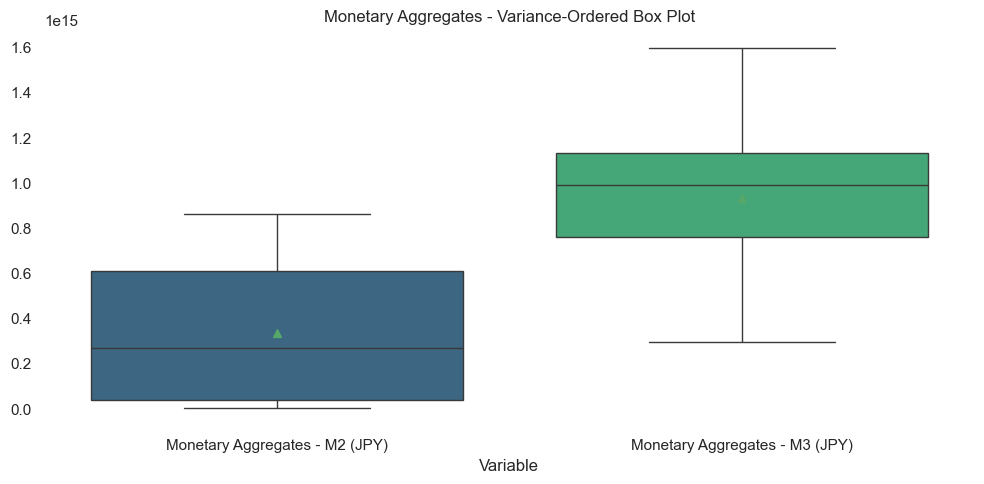

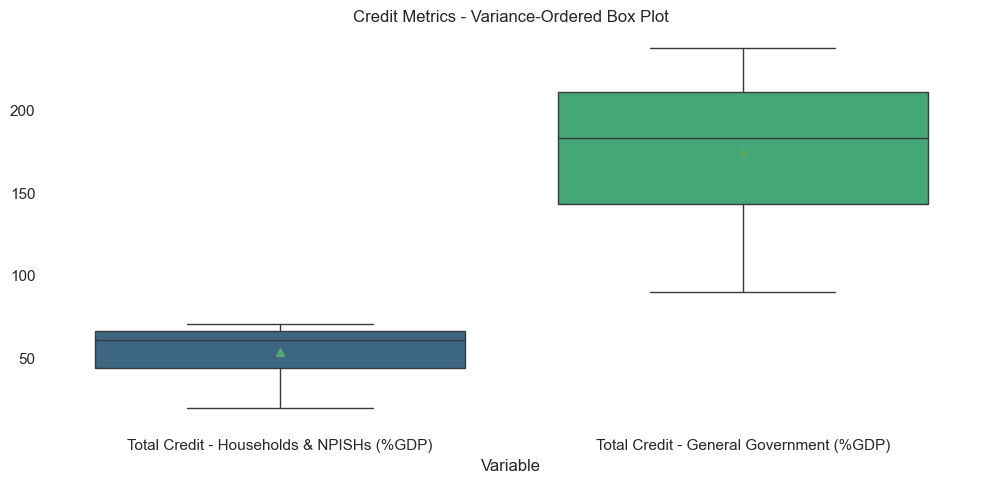

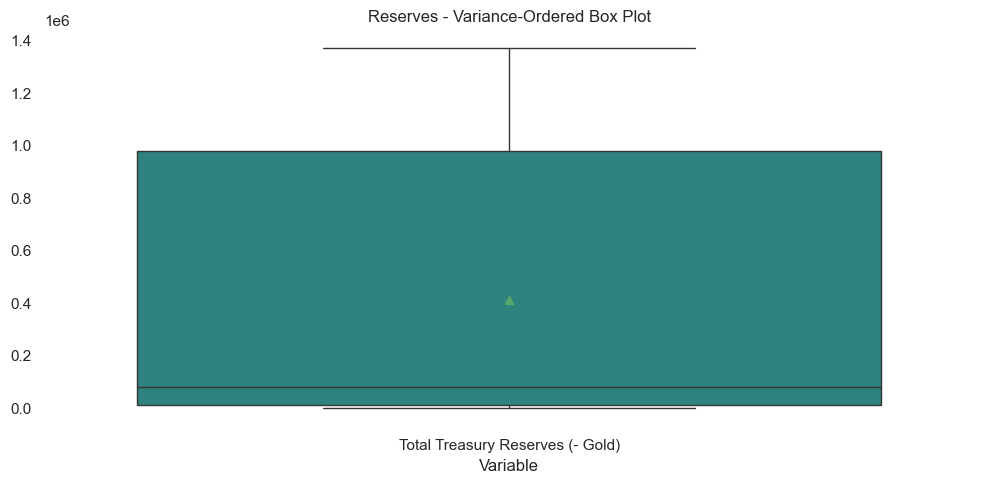

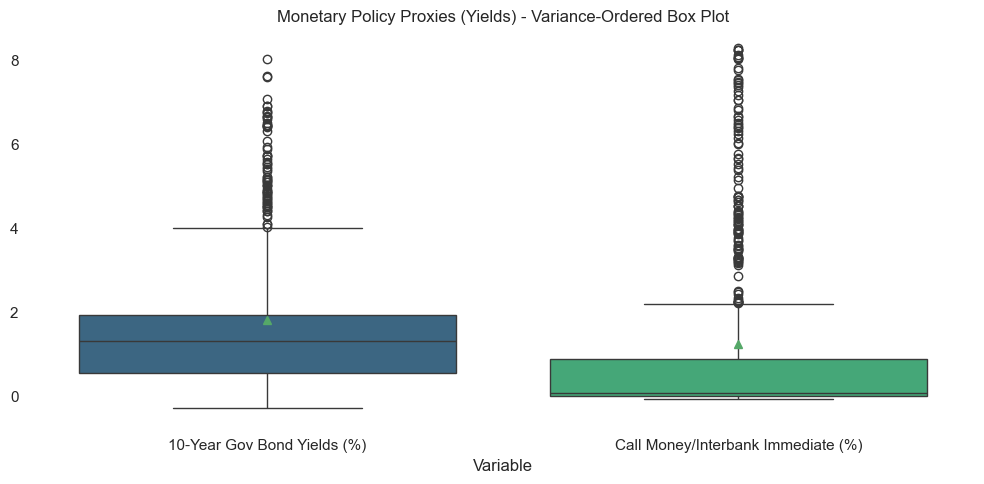

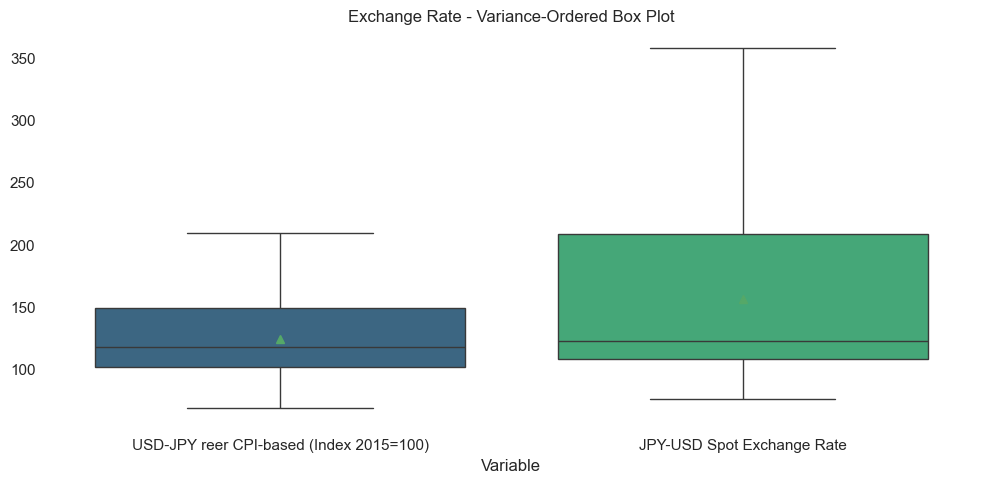

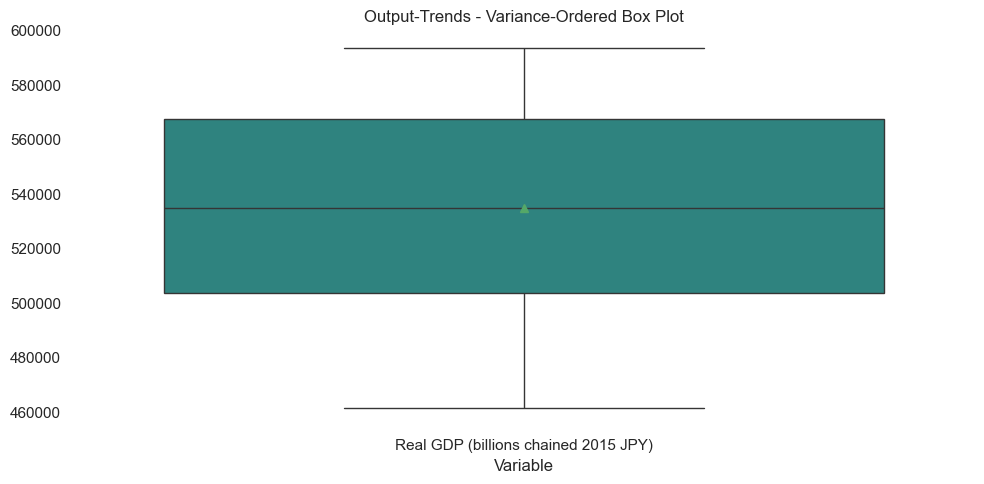

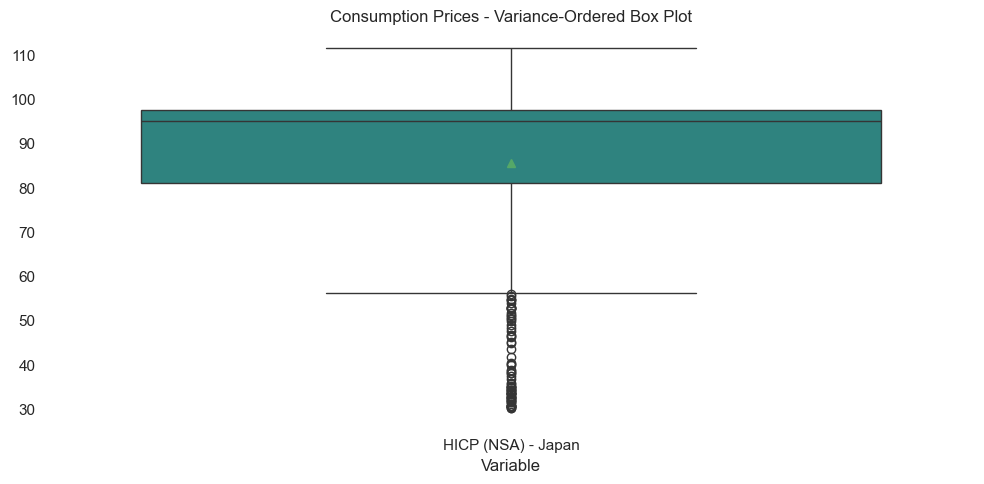

In [64]:
# Classic Variable Boxplot

#/////////
# Plotting
#/////////

# Metrics clusters loop
for group in metrics_group:
        df = jp_aggregated_df 
# (!!!) NaN cleaning
        df = df.copy()
        df = df[metrics_group[group]]
# We want to order variables by variance to be plugged in sns under the call "order"
# (!!!) Do not call it stats or it will clashes with the library scipy.stats
# var = variance of the variable
# n = number of observations 
        statistics = pd.DataFrame({
                "var": df.var(ddof=1, skipna=True),
                "n": df.count()
        })
# Variance sorting 
# We plot only those variables with more than 2 unique obs 
        statistics = statistics[statistics["n"] >= 2].sort_values("var")  
        variable_order = statistics.index.tolist()

# Df long format transformation 
        long_df = df.melt(var_name="Variable", value_name="Value").dropna()

# (!!!) This is essential cuz the order must be unique (no more than one variable can be associated to the same index number)
        variable_order = statistics.sort_values("var").index
        variable_order = pd.Index(variable_order).unique().tolist()

# We define the palette following past graphs design
        pal = sns.color_palette("viridis", n_colors=len(variable_order))
        palette_map = dict(zip(variable_order, pal))

# Plot set-up
        fig, ax = plt.subplots(figsize=(10, 5))

        sns.boxplot(
            data=long_df,
            x="Variable",
            y="Value",
            order=variable_order,
            hue="Variable",         
            palette=palette_map,
            dodge=False,            
            showmeans=True,
            ax=ax
        )

        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.set_title(f"{group} - Variance-Ordered Box Plot")
        ax.set_xlabel("Variable")
        ax.set_ylabel("")
        
        plt.tight_layout()
        plt.show()

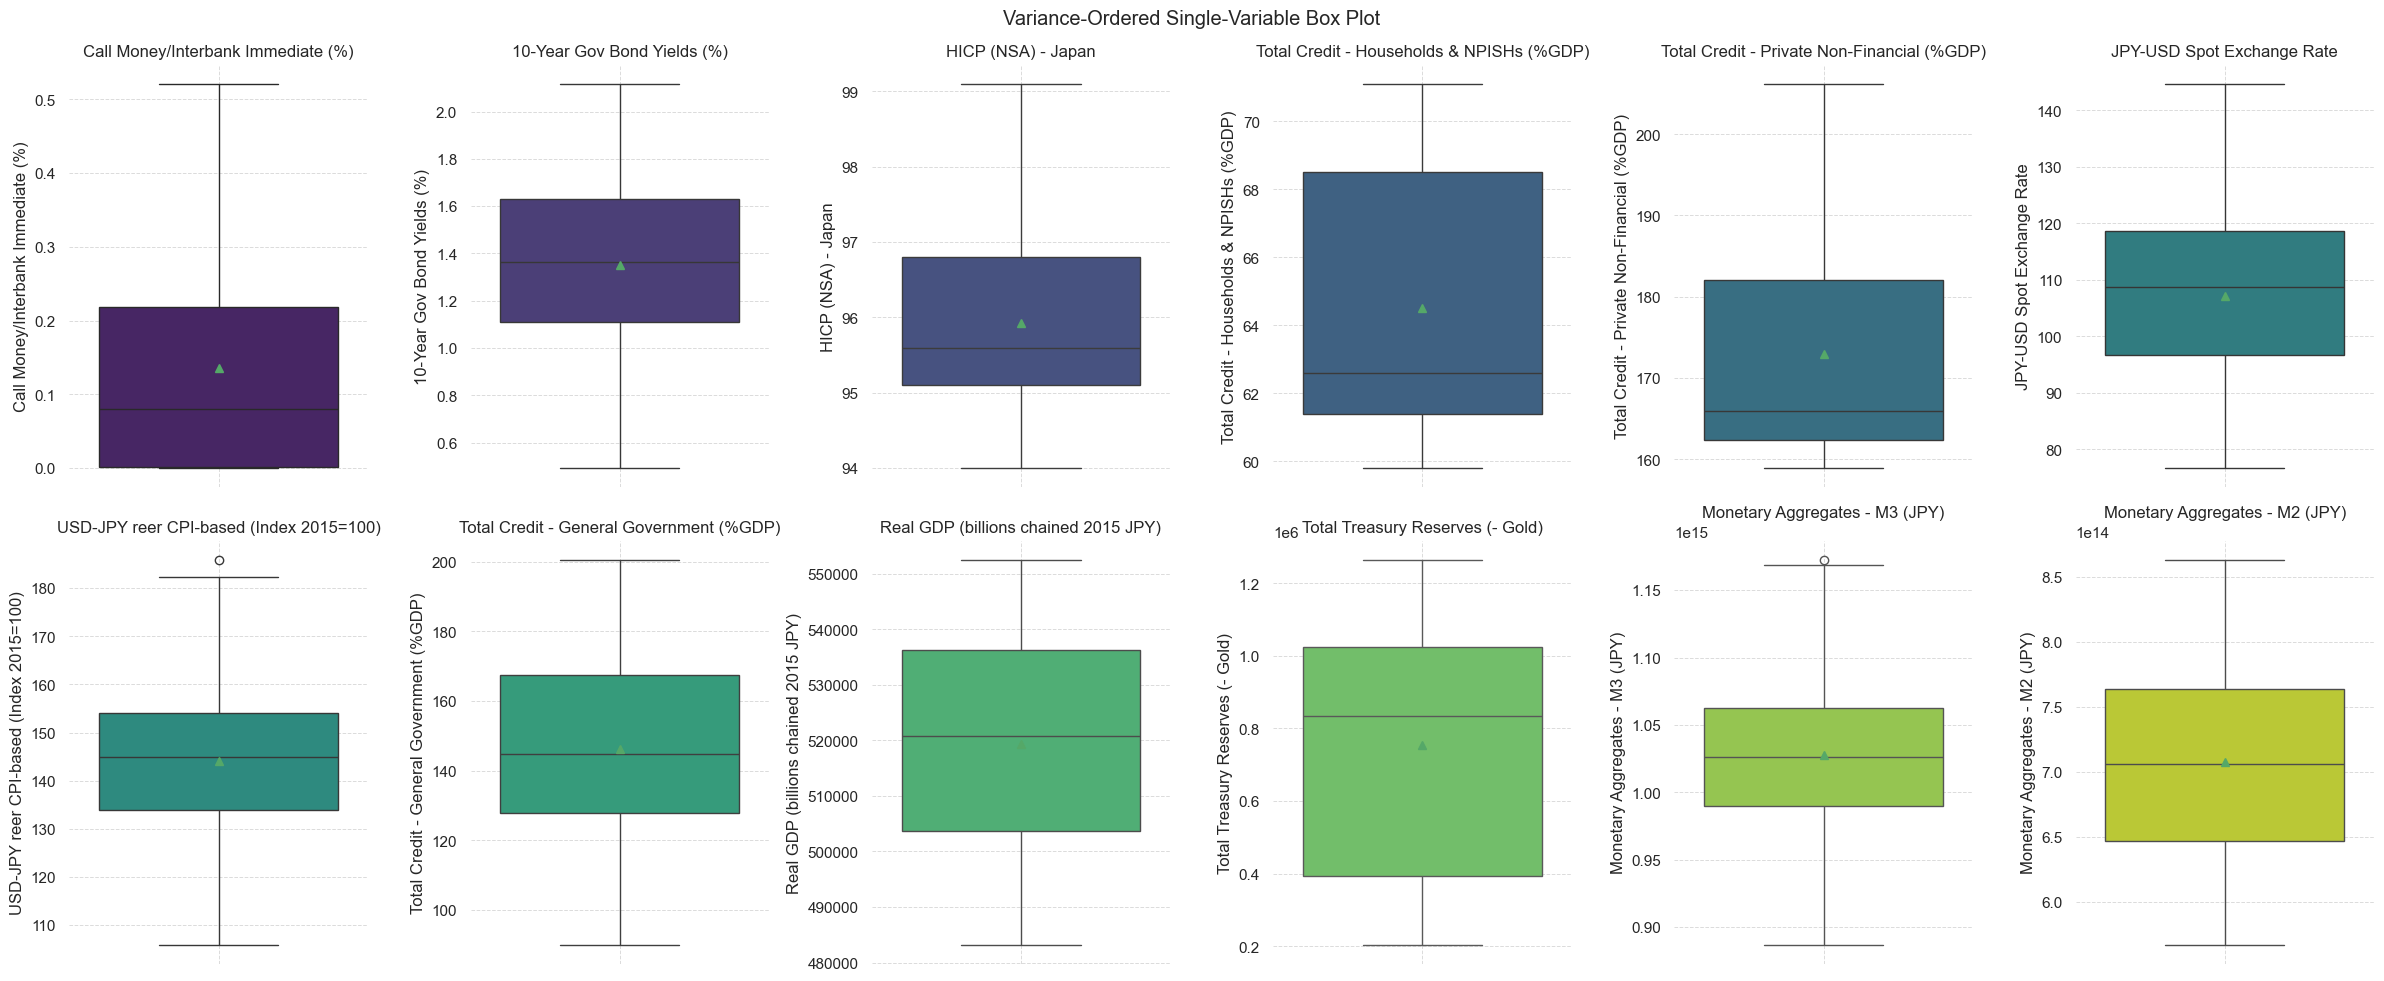

In [68]:
# Data Plotting (box-plot)

# General Layout (column and rows enumeration, figure's size, sub_plot)
# Sorting variables by std (so that logs variable move to the right-hand side, for better readibility)
df = jp_aggregated_df.copy()
df = df.drop(columns=["Country", "Time"]).dropna()

# Variance sorting
statistics = pd.DataFrame({
    "var": df.var(ddof=1, skipna=True),
    "n": df.count()
})
statistics = statistics[statistics["n"] >= 2].sort_values("var", ascending=True)

# List of explanatory variables to plot from the general train dataset jp_aggregated_kde
X = statistics.index.tolist()

# We define the palette following past graphs design
pal = sns.color_palette("viridis", n_colors=len(X))

# General Layout (column and rows enumeration, figure's size, sub_plot)
cols = 6
rows = (len(X) + cols - 4) // cols
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(4 * cols, 5 * rows))
axes = np.array(axes).flatten()

# Boxplot setup
for i, col in enumerate(X):
    sns.boxplot(
        data=df,
        y=col,
        ax=axes[i],
        color=pal[i],        
        showmeans=True
    )
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel("")
    axes[i].grid(True, linestyle="--", linewidth=0.7, alpha=0.7)

    for spine in axes[i].spines.values():
        spine.set_visible(False)

# Deletion of unused subplots (we have less variables than available slots for subplots on the page)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Variance-Ordered Single-Variable Box Plot")
plt.tight_layout()
plt.show()

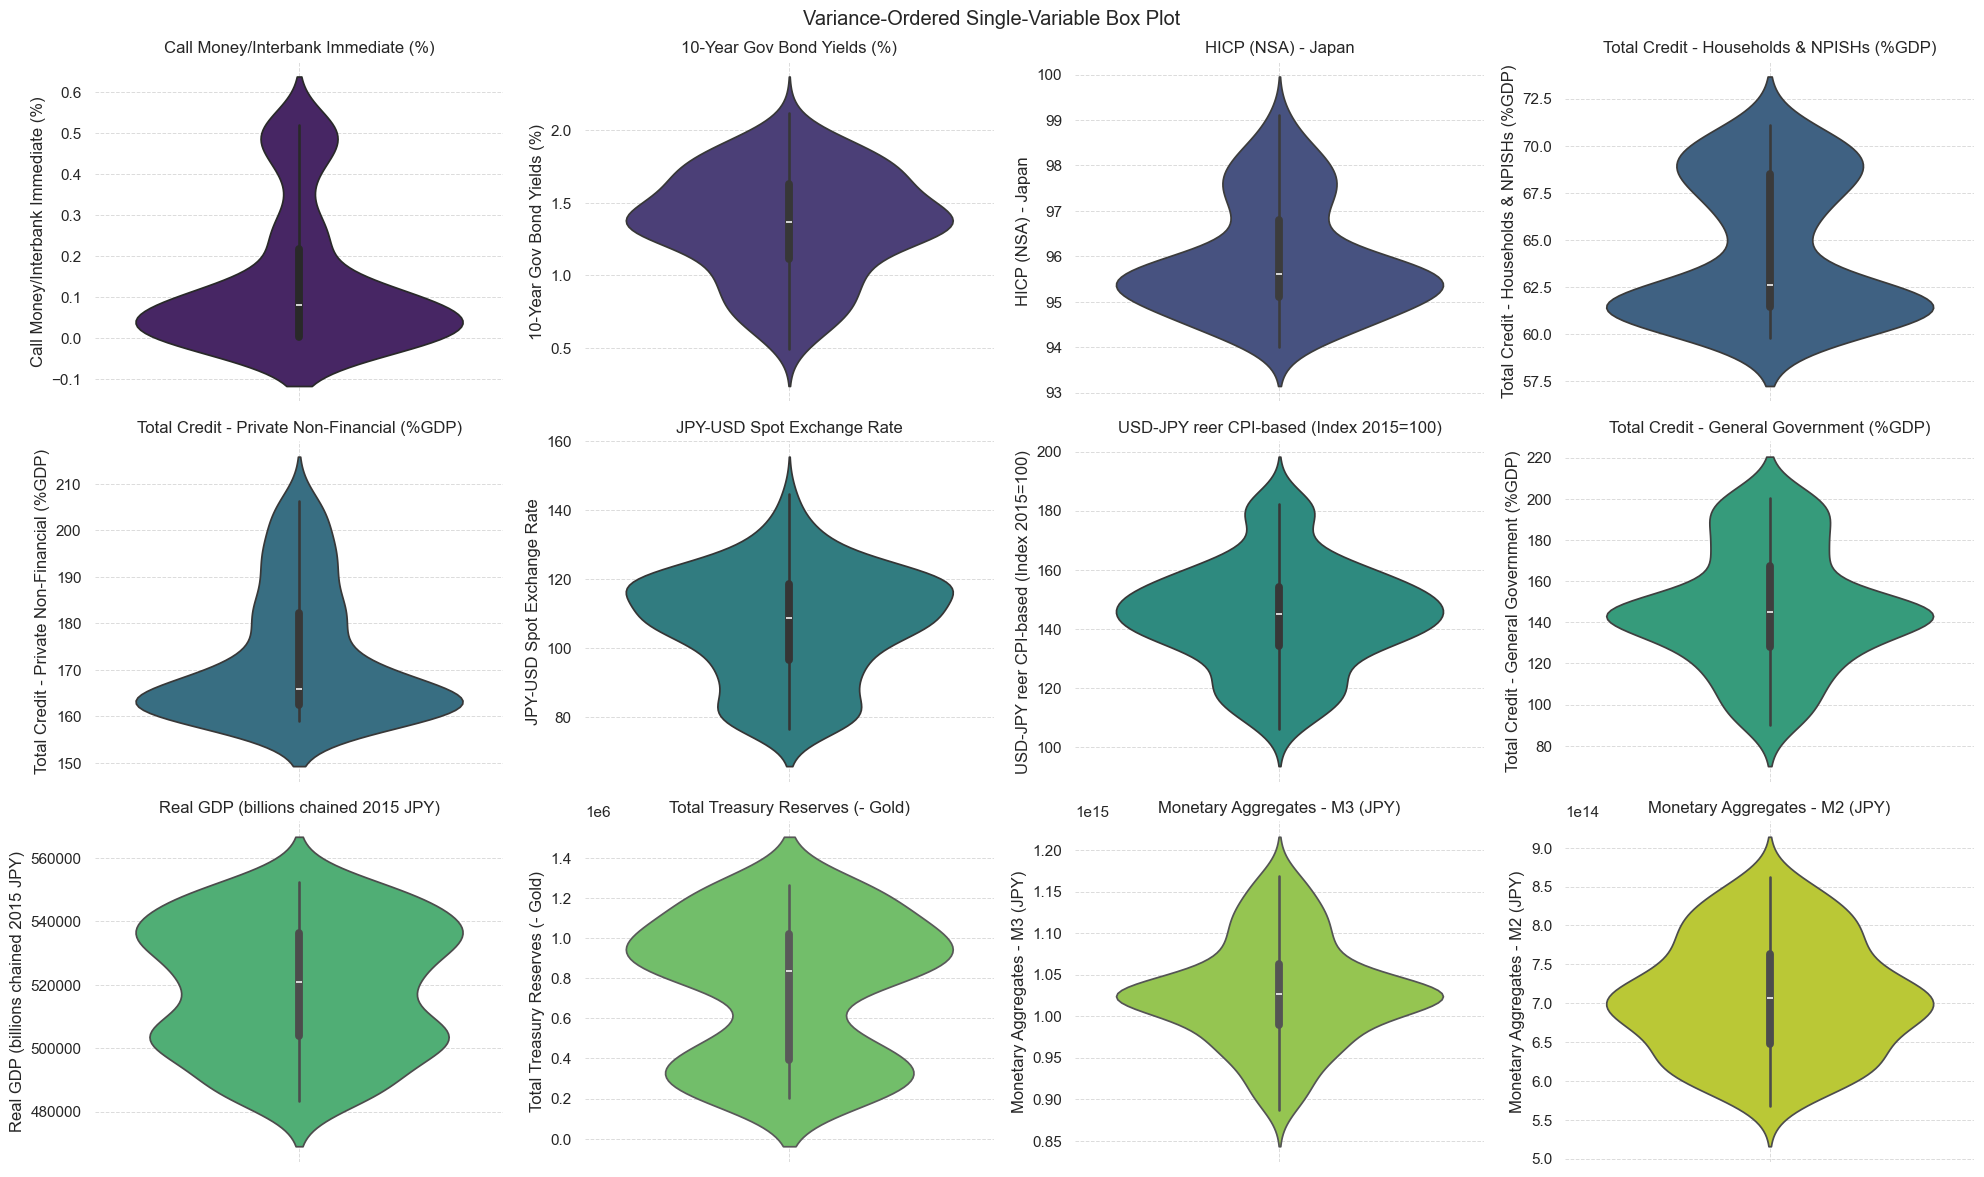

In [42]:
# Data Plotting (violin-plot)
# Same code as box-plots

# General Layout (column and rows enumeration, figure's size, sub_plot)
# Sorting variables by std (so that logs variable move to the right-hand side, for better readibility)
df = jp_aggregated_df.copy()
df = df.drop(columns=["Country", "Time"]).dropna()

# Variance sorting
statistics = pd.DataFrame({
    "var": df.var(ddof=1, skipna=True),
    "n": df.count()
})
statistics = statistics[statistics["n"] >= 2].sort_values("var", ascending=True)

# List of explanatory variables to plot from the general train dataset jp_aggregated_kde
X = statistics.index.tolist()

# We define the palette following past graphs design
pal = sns.color_palette("viridis", n_colors=len(X))

# General Layout (column and rows enumeration, figure's size, sub_plot)
cols = 4
rows = (len(X) + cols - 1) // cols
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(5 * cols, 4 * rows))
axes = np.array(axes).flatten()

# Boxplot setup
for i, col in enumerate(X):
    sns.violinplot(
        data=df,
        y=col,
        ax=axes[i],
        color=pal[i]
    )
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel("")
    axes[i].grid(True, linestyle="--", linewidth=0.7, alpha=0.7)

    for spine in axes[i].spines.values():
        spine.set_visible(False)

# Deletion of unused subplots (we have less variables than available slots for subplots on the page)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Variance-Ordered Single-Variable Box Plot")
plt.tight_layout()
plt.show()

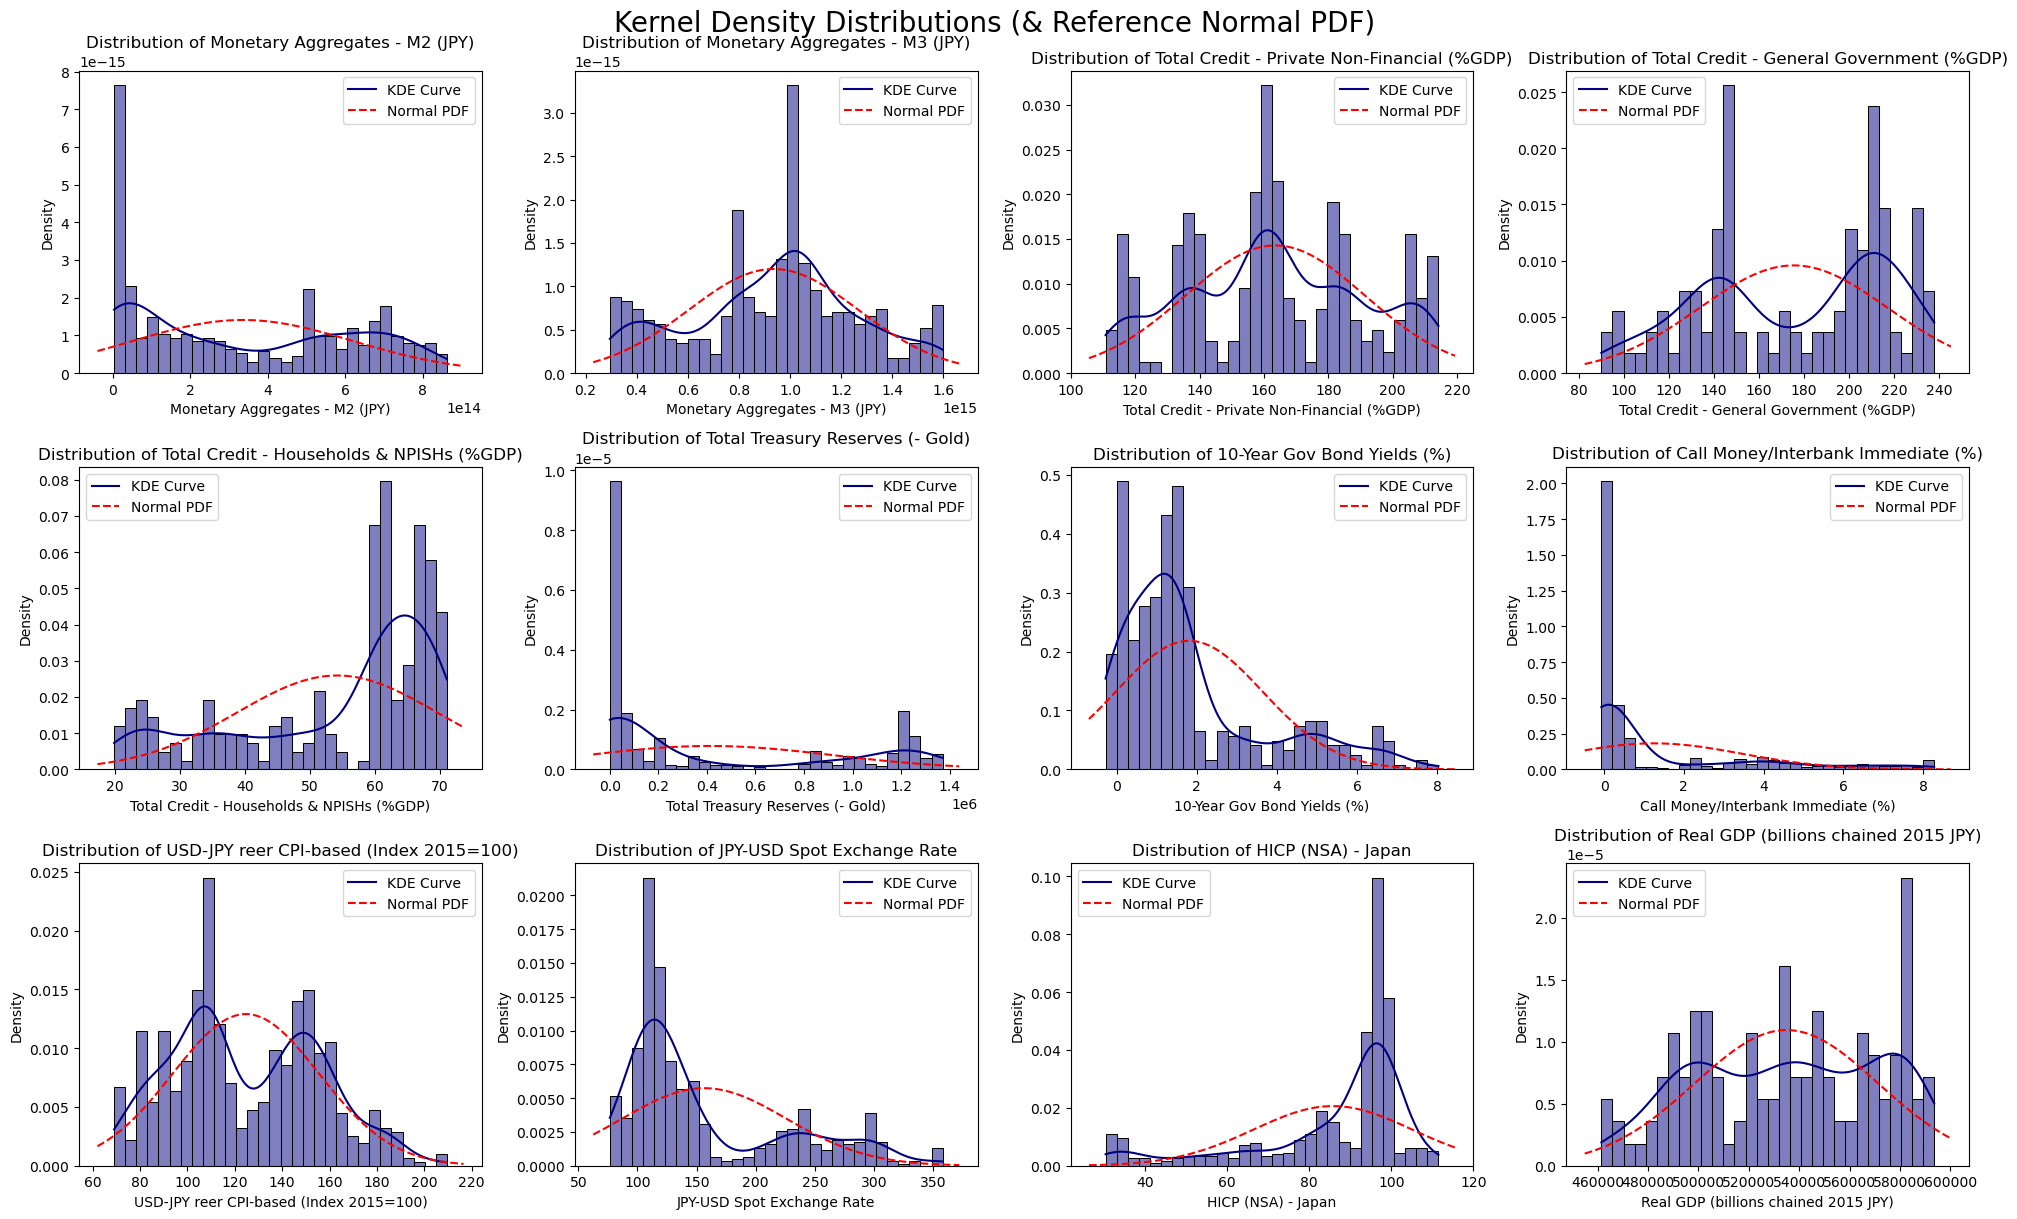

In [ ]:
# Data Plotting (variable distribution with respect to the theoretical normal)
# General Layout (column and rows enumeration, figure's size, sub_plot)

num_vars = len(jp_aggregated_df.columns)
cols = 4
rows = (num_vars + cols - 1) // cols
fig, sub_plot = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
sub_plot = sub_plot.flatten()

# Drop columns: time and country 
jp_aggregated_kde = jp_aggregated_df.drop(columns=["Country", "Time"])

# Iteration per each variable in jp_aggregated_df (var_i=location of the variable based on index, col_name = variable name)
for var_i, col_name in enumerate(jp_aggregated_kde.columns):
# Kernel density distribution of i
# We discard the NaN observations we mentioned earlier
    data = jp_aggregated_kde[col_name].dropna()
# sub_plot specs: kde curve, stat for Y sub_plot, color and number of bins (& title)
    sns.histplot(data, kde=True, ax=sub_plot[var_i], stat="density", color="navy", bins=30)
    sub_plot[var_i].set_title(f"Distribution of {col_name}")
# Normal distribution curve for comparison
    mu, std = data.mean(), data.std()
    xmin, xmax = sub_plot[var_i].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    sub_plot[var_i].plot(x, p, "r--", label="Normal PDF")
# Maual labelling of KDE curve 
    lines = sub_plot[var_i].get_lines()
    if len(lines) > 0:
        lines[0].set_label("KDE Curve")
    sub_plot[var_i].legend()
# Deletion of unused subplots (we have less variables than available slots for subplots on the page)
for j in range(var_i + 1, len(sub_plot)):
    fig.delaxes(sub_plot[j])

plt.suptitle("Kernel Density Distributions (& Reference Normal PDF)", fontsize = 20)
plt.tight_layout()
plt.show()

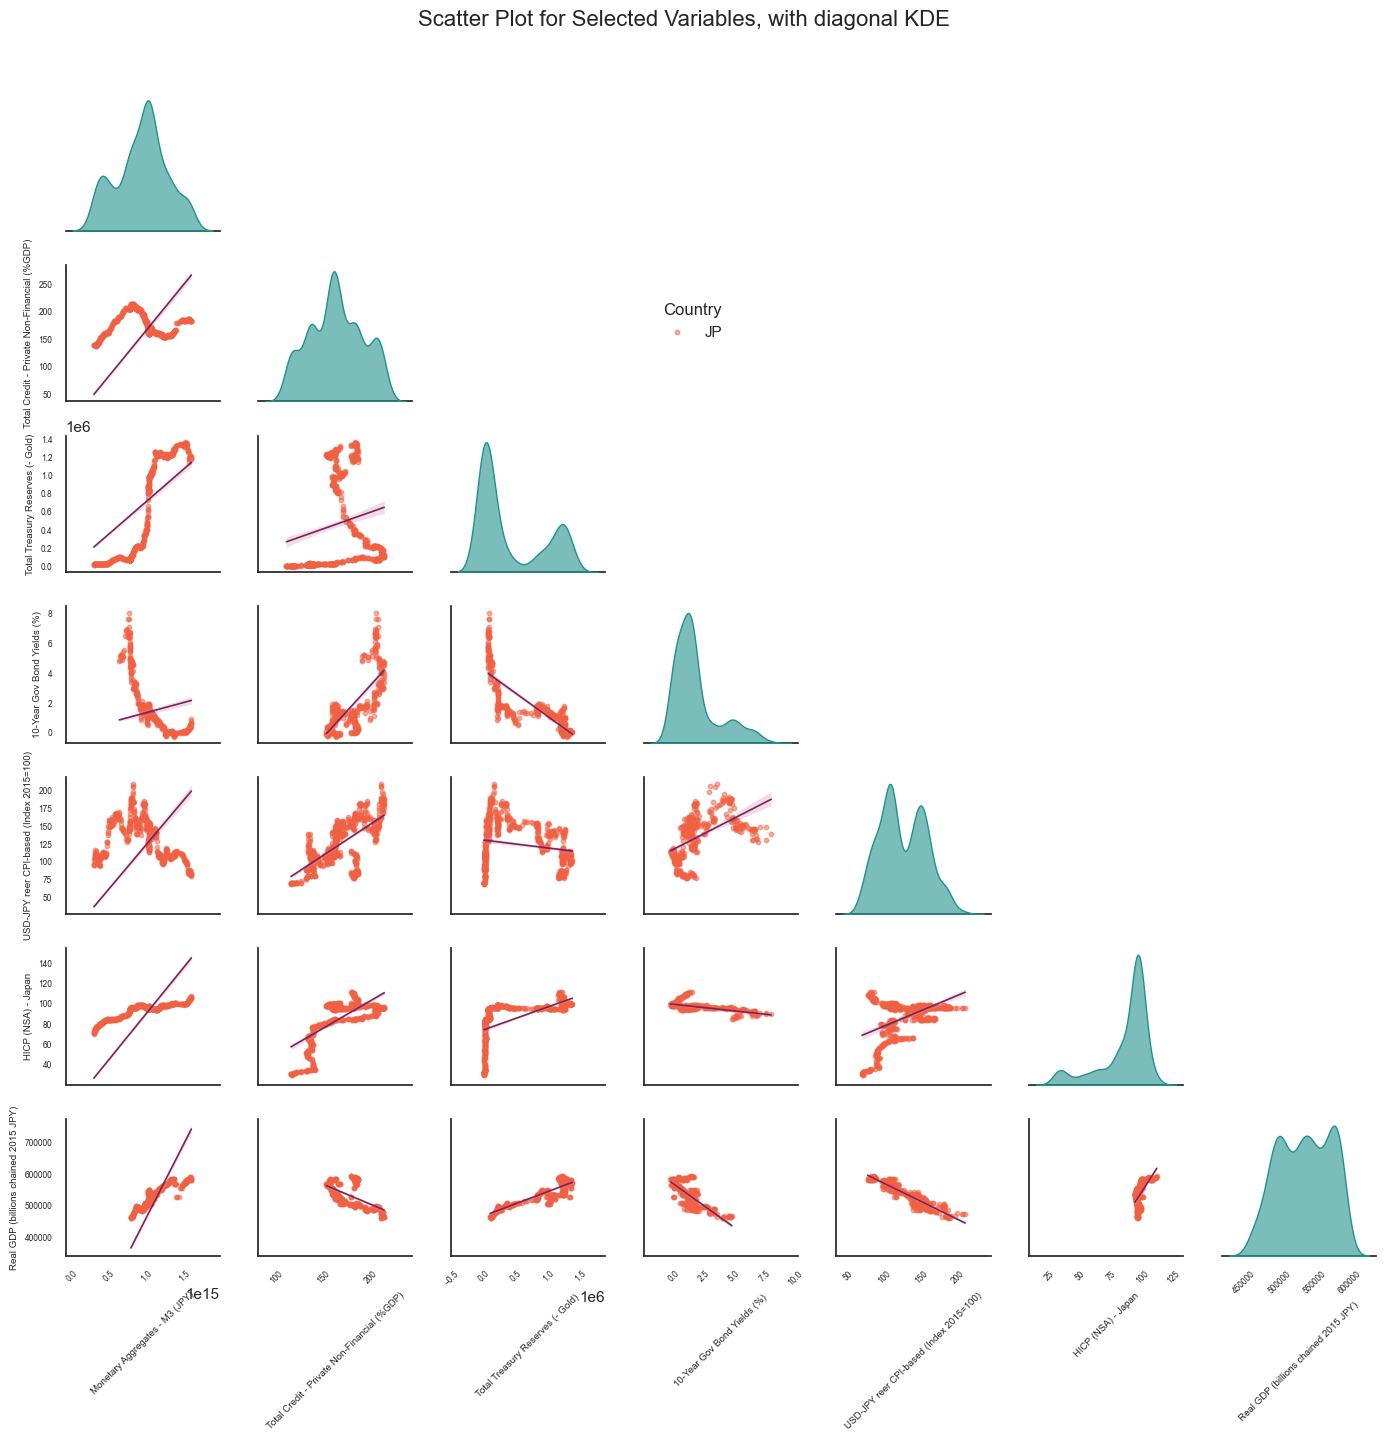

In [ ]:
# Data Plotting (Scatter-plot & diagonal KDE)

# Filtering of target variables (explanatory + dependent)
Xy = [col for col in jp_aggregated_df.columns if col in
        ["Monetary Aggregates - M3 (JPY)", 
         "Total Credit - Private Non-Financial (%GDP)", 
         "Total Treasury Reserves (- Gold)", 
         "10-Year Gov Bond Yields (%)", 
         "USD-JPY reer CPI-based (Index 2015=100)", 
         "HICP (NSA) - Japan",
         "Real GDP (billions chained 2015 JPY)"]] 

# Keep only numeric columns (regplot requires numeric data)
Xy = [col for col in Xy if pd.api.types.is_numeric_dtype(jp_aggregated_df[col])]

# Scatter-plot + Diagonal KDE (g)
# "reg" in kind offers much more insights than only "scatter", by adding the respective trend curves and std range
# Using hue for palette visibility
rocket_palette = sns.color_palette("rocket", n_colors=5)

g = sns.pairplot(jp_aggregated_df,
                 vars=Xy,
                 kind="reg",
                 diag_kind="kde",
                 palette="viridis",
                 corner=True,
                 height=2.0,
                 aspect=1.0,
                 plot_kws={
                     "scatter_kws": {"s": 10, "alpha": 0.5, "color": rocket_palette[3]},
                     "line_kws": {"color": rocket_palette[1], "lw": 1.2}
                 },
                 diag_kws={
                     "color": rocket_palette[2],  
                     "fill": True,
                     "alpha": 0.6
                 }) 

# Figure elements positioning adjustments
if hasattr(g, "_legend") and g._legend is not None:
    g._legend.set(bbox_to_anchor=(0.5, 0.8), transform=g.fig.transFigure)
    g._legend._ncol = 2

# Axis label and tick adjustment for better readability
for ax in g.axes.flatten():
    if ax is not None:
        ax.set_xlabel(ax.get_xlabel(), fontsize=7, rotation=45)
        ax.set_ylabel(ax.get_ylabel(), fontsize=7)
        ax.tick_params(axis="x", labelrotation=45, labelsize=6)
        ax.tick_params(axis="y", labelsize=6)

g.fig.subplots_adjust(top=0.93, bottom=0.10, left=0.08, right=0.97, hspace=0.25, wspace=0.25)
g.fig.suptitle("Scatter Plot for Selected Variables, with diagonal KDE", 
               fontsize=16, y=0.99, ha="center", linespacing=1.5)
plt.show()

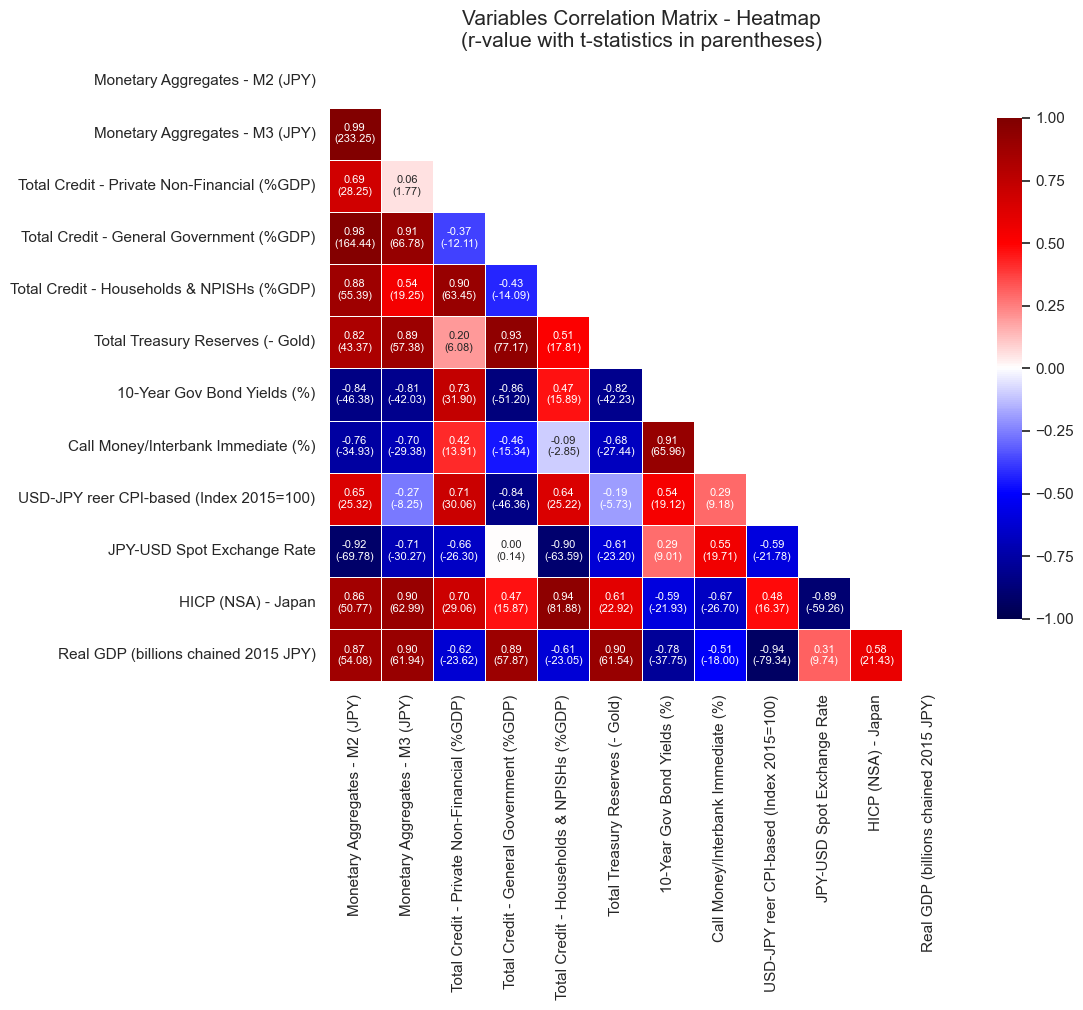

In [ ]:
# Data Plotting (Correlation Heatmap)

# Keep only numeric columns
Xy = [col for col in jp_aggregated_df.columns if pd.api.types.is_numeric_dtype(jp_aggregated_df[col])]

# Correlation matrix (restricted to selected variables)
corr_matrix = jp_aggregated_df[Xy].corr()

# Sample size
n = jp_aggregated_df.shape[0]

# t-statistics derived from correlation values
with np.errstate(divide="ignore", invalid="ignore"):
    t_stat_matrix = corr_matrix * np.sqrt((n - 2) / (1 - corr_matrix**2))
    t_stat_matrix = t_stat_matrix.round(2)

# For each cell, we want to have both the correlation index, as well as the just computed t-statistics
annot_matrix = corr_matrix.copy().astype(str)

for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
# We only want to keep the lower triangle and diagonal of the full correlation matrix
        if i >= j: 
            r = corr_matrix.iloc[i, j]
            t = t_stat_matrix.iloc[i, j]
            annot_matrix.iloc[i, j] = f"{r:.2f}\n({t:.2f})"
        else:
            annot_matrix.iloc[i, j] = ""

# We manually hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Heat-map plot
# General Layout (figure's size and style)
plt.figure(figsize=(12, 10))
sns.set(style="white")

sns.heatmap(corr_matrix,
            mask=mask,
            annot=annot_matrix,
            fmt="",               
            cmap="seismic",         
            vmin=-1, vmax=1,       
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": .8},
            annot_kws={"size": 8}) 

plt.title("Variables Correlation Matrix - Heatmap\n(r-value with t-statistics in parentheses)", 
          fontsize=15)
plt.tight_layout()
plt.show()

TypeError: tz must be string or tzinfo subclass, not <matplotlib.category.UnitData object at 0x000002718124BBC0>.

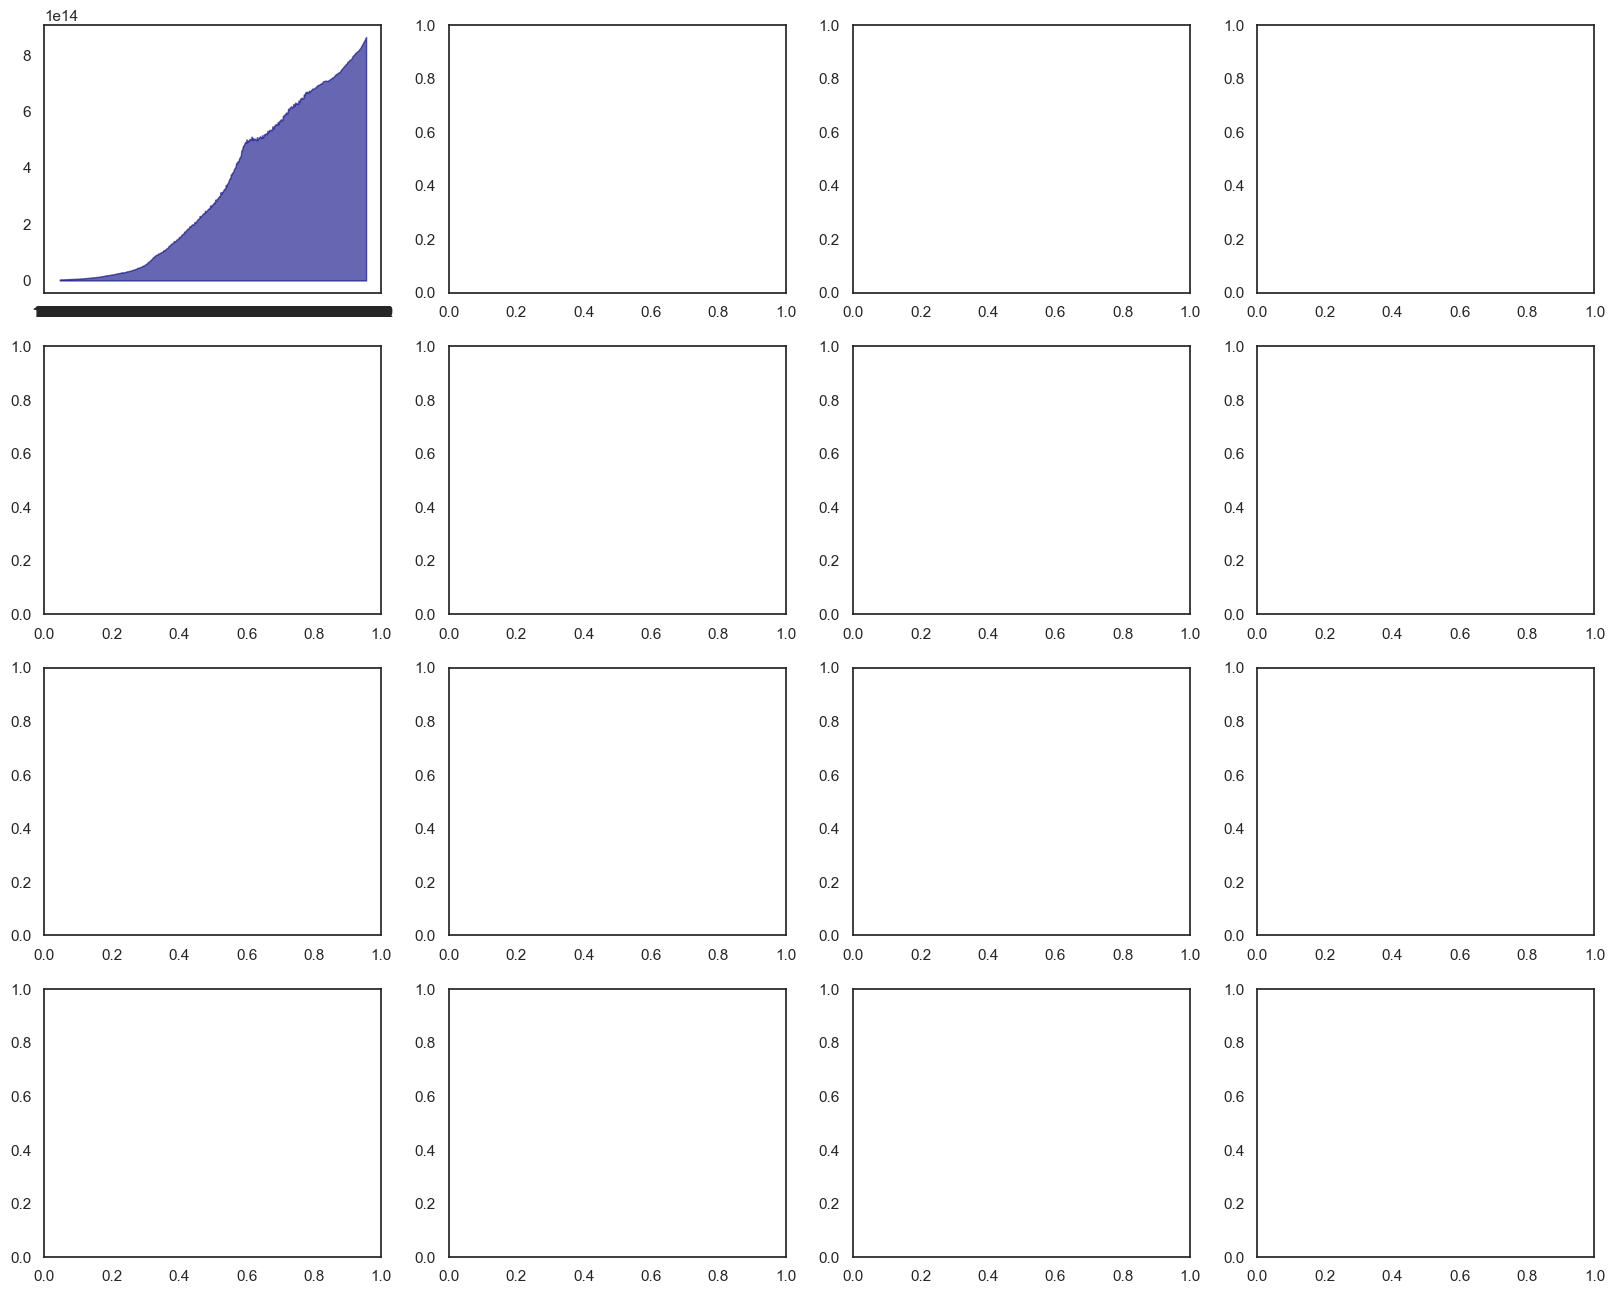

In [11]:
# Data Plotting Overtime

# General Layout (columns, rows, figure size, subplots)
num_vars = len(jp_aggregated_df.columns)
cols = 4
rows = (num_vars + cols - 1) // cols
fig, sub_plot = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
sub_plot = sub_plot.flatten()

# We keep only numeric columns and we sort them by time
# (!!!) They should be already sorted
jp_aggregated_time = jp_aggregated_df.drop(columns=["Country"])
jp_aggregated_time = jp_aggregated_time.sort_values("Time")

# Converting Time to numeric (for regression/trend line)
if not np.issubdtype(jp_aggregated_time["Time"].dtype, np.number):
    jp_aggregated_time["Time_num"] = (
        pd.to_datetime(jp_aggregated_time["Time"]).map(pd.Timestamp.toordinal)
    )
else:
    jp_aggregated_time["Time_num"] = jp_aggregated_time["Time"]

plot_index = 0 

# Iterate through variables 
# (!!!) Do not include time and time-derived columns
for col_name in jp_aggregated_time.columns:
    if col_name in ["Time", "Time_num"]:
        continue

    data = jp_aggregated_time.dropna(subset=[col_name])
    x = data["Time_num"].values.reshape(-1, 1)
    y = data[col_name].values
    ax = sub_plot[plot_index]

    ax.fill_between(data["Time"], y, color="Navy", alpha=0.6, label="Actual Value")

# (!!!) We need to fit the regression line between the boundaries of data (time and value range) or it will interfere with the plotting
    model = LinearRegression().fit(x, y)
    x_fit = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
    y_fit = model.predict(x_fit)

# Converting numeric x_fit back to datetime if needed
    if "Time_num" in jp_aggregated_time.columns and not np.issubdtype(jp_aggregated_time["Time"].dtype, np.number):
        time_fit = pd.to_datetime(
            pd.Series(x_fit.flatten().astype(int)).map(pd.Timestamp.fromordinal)
        )
    else:
        time_fit = x_fit.flatten()

    ax.plot(time_fit, y_fit, color="red", linestyle="--", label="Linear Trend")

# General setup per sub-plot
    ax.set_title(f"{col_name} Over Time")
    ax.set_xlabel("Time")
    ax.set_ylabel(col_name)
    ax.tick_params(axis="x", rotation=45)
    ax.legend()

    plot_index += 1 

# Unused subplots deletion
for j in range(plot_index, len(sub_plot)):
    fig.delaxes(sub_plot[j])

plt.suptitle("Variables Over Time", fontsize=20)
plt.tight_layout()
plt.show()